In [1]:
import math
import numpy as np

In [2]:
import ellipsefns
#getfocus, getsemiminor, theoreticalx, theoreticaly

In [3]:
import initdat

In [4]:
delta=0.005 #with dtmin=0.001, accuracy of 1e-6 appears to be too much to ask. try 0.05
rad0=50
ecc0=1.1
theta0= 0. #math.pi/6. #math.pi/6.
mass0=1.0
initdateqhyperb=initdat.InitialDataEqualMassConic(rad0,ecc0,theta0,mass0)
print(initdateqhyperb)

angle 0.0
1.1
(array([3.14159265, 0.        ]), 0.0, 50, 1.1, array([1., 1.]))


In [5]:
import getxyuvtwohyperb_apper

In [6]:
useperihelion=True

In [7]:
xyuvaeqhyperb=getxyuvtwohyperb_apper.getxyuveqtwohyperbolas(initdateqhyperb,useperihelion)
print(xyuvaeqhyperb)
masses,xvec,avec=xyuvaeqhyperb

initdat 50 [3.14159265 0.        ] 1.1 [-1.  1.] [1.2246468e-16 0.0000000e+00]
coordsep 50
pi
zero
[-50.  50.]
[0. 0.]
(array([1., 1.]), array([[-5.        ,  0.        ,  0.        , -0.        , -0.32403703,
         0.        ],
       [ 5.        ,  0.        ,  0.        , -0.        ,  0.32403703,
         0.        ]]), array([[ 0.01, -0.  ,  0.  ],
       [-0.01, -0.  ,  0.  ]]))


In [8]:
import RK4implicit

In [9]:
def RK4implicit(h,t,xvec,f): #not a finite difference so no step in y
    k1= h*f(t,xvec)
    k2=h*f(t+h/2, xvec+k1/2)
    k3=h*f(t+h/2,xvec+k2/2)
    k4=h*f(t+h,xvec+k3)
    return t+h, xvec+1/6.*(k1+2.*k2+2.*k3+k4)

In [10]:
import OrbitDiffEqAdaptive

In [11]:
masses, xvec,avec=xyuvaeqhyperb
ODEeq= OrbitDiffEqAdaptive.OrbitDiffEqAdaptive(masses,xvec,avec,0.0, delta)
ODEeq.print2D()
ODEeq.print2D()

[1. 1.] [[-5.          0.          0.         -0.         -0.32403703  0.        ]
 [ 5.          0.          0.         -0.          0.32403703  0.        ]] 0.0
[1. 1.] [[-5.          0.          0.         -0.         -0.32403703  0.        ]
 [ 5.          0.          0.         -0.          0.32403703  0.        ]] 0.0


In [12]:
print(xyuvaeqhyperb)

(array([1., 1.]), array([[-5.        ,  0.        ,  0.        , -0.        , -0.32403703,
         0.        ],
       [ 5.        ,  0.        ,  0.        , -0.        ,  0.32403703,
         0.        ]]), array([[ 0.01, -0.  ,  0.  ],
       [-0.01, -0.  ,  0.  ]]))


In [13]:
import timestepAdaptive

In [14]:
import parabfns

In [15]:
import hyperbfns

In [16]:
numsteps=5000 #50000

#numsteps=6000*10

dt=.01
dtmax=1
dtmin = 0.001
outputevery=1
nptimes, npstar1x, npstar2x, npstar1a, npstar2a,nperr,npdt= timestepAdaptive.timestepAdaptive(numsteps,dt,dtmax,dtmin,xyuvaeqhyperb,outputevery,delta)

0.01
[-1.49999946e-06  3.24036959e-03  0.00000000e+00]
[2.24999839e-12 1.04999951e-05 0.00000000e+00]
1.0499997350000742e-05
0.0032403699403001415
46.291010830111006 False
0.023475598624079472
[-1.06140826e-05  7.60694747e-03  0.00000000e+00]
[1.12658750e-10 5.78656498e-05 0.00000000e+00]
5.7865762489713874e-05
0.007606954876276963
19.718797132317658 False
0.044522474075819704
[-4.46372504e-05  1.44267831e-02  0.00000000e+00]
[1.99248412e-09 2.08132070e-04 0.00000000e+00]
0.00020813406275148268
0.014426852142844006
10.397278527208227 False
0.07195346599138731
[-0.00013377  0.02331477  0.        ]
[1.78957397e-08 5.43578582e-04 0.00000000e+00]
0.0005435964780266811
0.023315155543694774
6.433583499749166 False
0.10313533025957686
[-0.00031416  0.03341654  0.        ]
[9.86986858e-08 1.11666486e-03 0.00000000e+00]
0.0011167635572886386
0.033418012467659394
4.488597284029502 False
0.13510693246129316
[-0.00061556  0.04377049  0.        ]
[3.78912743e-07 1.91585610e-03 0.00000000e+00]
0.001

0.4193280229929191
[-0.06469005  0.0724984   0.        ]
[0.0041848  0.00525602 0.        ]
0.009440820931539067
0.09716388697216197
1.5437834433587028 False
0.42067140376630086
[-0.0649045   0.07231341  0.        ]
[0.00421259 0.00522923 0.        ]
0.009441822885216243
0.09716904283369392
1.5437015290633969 False
0.42201348999036103
[-0.06511607  0.07212993  0.        ]
[0.0042401  0.00520273 0.        ]
0.009442829718365828
0.09717422352849457
1.5436192289822128 False
0.42335421512199434
[-0.06532481  0.07194797  0.        ]
[0.00426733 0.00517651 0.        ]
0.009443840959500387
0.097179426626732
1.5435365818338567 False
0.42469351486510987
[-0.06553076  0.07176751  0.        ]
[0.00429428 0.00515058 0.        ]
0.0094448561559648
0.09718464979596726
1.5434536247742319 False
0.42603132710802677
[-0.06573398  0.07158854  0.        ]
[0.00432096 0.00512492 0.        ]
0.009445874873304902
0.09718989079788547
1.5433703934490222 False
0.4273675918624002
[-0.06593451  0.07141104  0.    

0.009544285644634791
0.09769485986803396
1.535392959287927 False
0.5643221209642567
[-0.0785176   0.05813674  0.        ]
[0.00616501 0.00337988 0.        ]
0.009544894016418008
0.09769797345092684
1.5353440271240035 False
0.5653547039250284
[-0.07857518  0.0580641   0.        ]
[0.00617406 0.00337144 0.        ]
0.009545498587128508
0.09770106748203168
1.5352954053197696 False
0.5663846920759114
[-0.07863227  0.05799195  0.        ]
[0.00618303 0.00336307 0.        ]
0.009546099382208944
0.09770414209340843
1.5352470917414636 False
0.5674120927025486
[-0.07868887  0.05792028  0.        ]
[0.00619194 0.00335476 0.        ]
0.009546696427064405
0.0977071974168966
1.5351990842596859 False
0.5684369131247862
[-0.07874498  0.05784909  0.        ]
[0.00620077 0.00334652 0.        ]
0.009547289747054254
0.09771023358407376
1.5351513807500425 False
0.5694591606947523
[-0.07880062  0.05777838  0.        ]
[0.00620954 0.00333834 0.        ]
0.009547879367489664
0.09771325072624318
1.53510397909

[-0.08310969  0.05186899  0.        ]
[0.00690722 0.00269039 0.        ]
0.009597613502550438
0.09796741041055662
1.5311214144723022 False
0.6748898280013412
[-0.0831334   0.05183384  0.        ]
[0.00691116 0.00268675 0.        ]
0.009597909328945537
0.09796892021935087
1.5310978182075738 False
0.6756567600603158
[-0.08315697  0.05179887  0.        ]
[0.00691508 0.00268312 0.        ]
0.009598203606296407
0.09797042209920506
1.5310743465829888 False
0.6764219712459533
[-0.08318039  0.05176407  0.        ]
[0.00691898 0.00267952 0.        ]
0.009598496345385595
0.09797191610551258
1.5310509987214587 False
0.6771854673859615
[-0.08320367  0.05172945  0.        ]
[0.00692285 0.00267594 0.        ]
0.009598787556908961
0.09797340229321916
1.531027773753057 False
0.6779472542848185
[-0.08322682  0.05169501  0.        ]
[0.0069267  0.00267237 0.        ]
0.009599077251470987
0.09797488071679897
1.5310046708153908 False
0.6787073377238473
[-0.08324982  0.05166075  0.        ]
[0.00693053 0.0

0.09810611884792854
1.5289566212736503 False
0.7572838438506175
[-0.0852264   0.04859461  0.        ]
[0.00726354 0.00236144 0.        ]
0.009624976378206158
0.09810696396386016
1.528943450489975 False
0.7578775747833226
[-0.08523874  0.04857467  0.        ]
[0.00726564 0.0023595  0.        ]
0.009625141492448057
0.09810780546138037
1.5289303363232063 False
0.7584701448068074
[-0.08525102  0.04855481  0.        ]
[0.00726774 0.00235757 0.        ]
0.009625305902256381
0.09810864336161408
1.5289172784412275 False
0.7590615574430258
[-0.08526324  0.04853503  0.        ]
[0.00726982 0.00235565 0.        ]
0.00962546961172793
0.09810947768553215
1.5289042765143572 False
0.7596518161996446
[-0.08527541  0.04851533  0.        ]
[0.0072719  0.00235374 0.        ]
0.00962563262493105
0.09811030845395936
1.5288913302152254 False
0.7602409245700968
[-0.08528752  0.04849571  0.        ]
[0.00727396 0.00235183 0.        ]
0.009625794945903154
0.09811113568756176
1.5288784392189698 False
0.76082888

0.0981891920153997
1.527663044385521 False
0.8234982902835926
[-0.08641774  0.04661753  0.        ]
[0.00746803 0.00217319 0.        ]
0.009641219124481045
0.09818970987064299
1.5276549874484087 False
0.8239702506873559
[-0.08642503  0.04660508  0.        ]
[0.00746929 0.00217203 0.        ]
0.009641320457325206
0.09819022587470305
1.5276469593970534 False
0.8244413984356626
[-0.0864323   0.04659269  0.        ]
[0.00747054 0.00217088 0.        ]
0.009641421428941293
0.09819074003663122
1.5276389600897264 False
0.8249117357001892
[-0.08643954  0.04658033  0.        ]
[0.00747179 0.00216973 0.        ]
0.00964152204109444
0.09819125236544465
1.52763098938524 False
0.8253812646446612
[-0.08644676  0.04656802  0.        ]
[0.00747304 0.00216858 0.        ]
0.009641622295536242
0.0981917628700913
1.527623047143491 False
0.8258499874249182
[-0.08645394  0.04655575  0.        ]
[0.00747428 0.00216744 0.        ]
0.00964172219400881
0.09819227155947055
1.5276151332251426 False
0.8263179061889

0.8744936433258244
[-0.08712527  0.04539093  0.        ]
[0.00759081 0.00206034 0.        ]
0.009651150338765076
0.09824026841761517
1.52686879236075 False
0.8748822310465931
[-0.08713009  0.04538245  0.        ]
[0.00759165 0.00205957 0.        ]
0.009651218611889757
0.09824061589734542
1.5268633917843055 False
0.8752702174738388
[-0.08713488  0.04537399  0.        ]
[0.00759249 0.0020588  0.        ]
0.009651286674672074
0.09824096230530355
1.5268580079035141 False
0.8756576040456049
[-0.08713967  0.04536555  0.        ]
[0.00759332 0.00205803 0.        ]
0.00965135452800157
0.09824130764602826
1.526852640647483 False
0.8760443921951913
[-0.08714443  0.04535714  0.        ]
[0.00759415 0.00205727 0.        ]
0.009651422172758634
0.0982416519240115
1.5268472899460488 False
0.8764305833512244
[-0.08714918  0.04534875  0.        ]
[0.00759498 0.00205651 0.        ]
0.009651489609816846
0.09824199514371054
1.5268419557295911 False
0.8768161789377001
[-0.08715392  0.04534039  0.        ]


[0.00737417 0.00190273 0.        ]
0.009276896145559389
0.0963166452154527
1.5573632123965893 False
0.9
[-0.08584649  0.04359945  0.        ]
[0.00736962 0.00190091 0.        ]
0.009270532793745316
0.09628360604872106
1.557897612643398 False
0.9
[-0.08582007  0.04357868  0.        ]
[0.00736509 0.0018991  0.        ]
0.009264186869908665
0.09625064607527922
1.5584310975188937 False
0.9
[-0.08579372  0.04355797  0.        ]
[0.00736056 0.0018973  0.        ]
0.009257858299083236
0.09621776498694634
1.558963669758388 False
0.9
[-0.08576742  0.04353731  0.        ]
[0.00735605 0.0018955  0.        ]
0.009251547006749508
0.09618496247724749
1.5594953320846014 False
0.9
[-0.08574117  0.04351671  0.        ]
[0.00735155 0.0018937  0.        ]
0.00924525291881333
0.0961522382413084
1.5600260872092502 False
0.9
[-0.08571499  0.04349617  0.        ]
[0.00734706 0.00189192 0.        ]
0.009238975961625612
0.09611959197596301
1.560555937831187 False
0.9
[-0.08568887  0.04347568  0.        ]
[0.00

1.618711603896167 False
0.9
[-0.08290249  0.04134716  0.        ]
[0.00687282 0.00170959 0.        ]
0.008582410577987377
0.09264130060608701
1.6191482526546506 False
0.9
[-0.08288216  0.04133204  0.        ]
[0.00686945 0.00170834 0.        ]
0.008577790305643611
0.09261636089613763
1.619584256481572 False
0.9
[-0.08286187  0.04131695  0.        ]
[0.00686609 0.00170709 0.        ]
0.008573180571850053
0.09259147137749811
1.620019617016838 False
0.9
[-0.08284162  0.0413019   0.        ]
[0.00686273 0.00170585 0.        ]
0.008568581338872772
0.09256663188683475
1.6204543358926478 False
0.9
[-0.08282141  0.04128688  0.        ]
[0.00685939 0.00170461 0.        ]
0.008563992569150258
0.0925418422614887
1.6208884147362874 False
0.9
[-0.08280124  0.04127189  0.        ]
[0.00685605 0.00170337 0.        ]
0.008559414225314262
0.0925171023395905
1.6213218551680801 False
0.9
[-0.0827811   0.04125694  0.        ]
[0.00685271 0.00170214 0.        ]
0.008554846270165877
0.09249241195993257
1.62

[-0.08066028  0.03971328  0.        ]
[0.00650608 0.00157714 0.        ]
0.00808322513631242
0.08990675801246768
1.6683951608976821 False
0.9
[-0.08064395  0.03970162  0.        ]
[0.00650345 0.00157622 0.        ]
0.00807966493264138
0.08988695640993402
1.668762699183154 False
0.9
[-0.08062764  0.03968999  0.        ]
[0.00650082 0.0015753  0.        ]
0.008076111727279517
0.08986718938121697
1.669129757287717 False
0.9
[-0.08061136  0.03967839  0.        ]
[0.00649819 0.00157437 0.        ]
0.008072565498639314
0.08984745682900164
1.669496336278957 False
0.9
[-0.08059511  0.0396668   0.        ]
[0.00649557 0.00157346 0.        ]
0.008069026225228005
0.08982775865637528
1.6698624372206148 False
0.9
[-0.08057888  0.03965524  0.        ]
[0.00649296 0.00157254 0.        ]
0.00806549388563255
0.08980809476674444
1.6702280611741067 False
0.9
[-0.08056268  0.0396437   0.        ]
[0.00649035 0.00157162 0.        ]
0.008061968458542432
0.0897884650639626
1.6705932091961313 False
0.9
[-0.08

0.9
[-0.07887545  0.03846081  0.        ]
[0.00622134 0.00147923 0.        ]
0.007700569992467406
0.08775289164732639
1.7093453809230699 False
0.9
[-0.07886192  0.03845147  0.        ]
[0.0062192  0.00147852 0.        ]
0.007697717502341798
0.08773663717251647
1.7096620617571099 False
0.9
[-0.07884841  0.03844215  0.        ]
[0.00621707 0.0014778  0.        ]
0.007694869954393075
0.0877204078558295
1.7099783695320754 False
0.9
[-0.07883491  0.03843285  0.        ]
[0.00621494 0.00147708 0.        ]
0.007692027335195661
0.08770420363469279
1.7102943049888786 False
0.9
[-0.07882144  0.03842356  0.        ]
[0.00621282 0.00147637 0.        ]
0.007689189631369626
0.08768802444672605
1.7106098688667681 False
0.9
[-0.07880799  0.03841429  0.        ]
[0.0062107  0.00147566 0.        ]
0.007686356829586854
0.08767187022977697
1.7109250619026242 False
0.9
[-0.07879456  0.03840503  0.        ]
[0.00620858 0.00147495 0.        ]
0.007683528916565284
0.08765574092188876
1.711239884831583 False
0

0.9
[-0.07735961  0.03742946  0.        ]
[0.00598451 0.00140096 0.        ]
0.007385473398210075
0.08593877703464295
1.7454286083165136 False
0.9
[-0.07734821  0.03742182  0.        ]
[0.00598275 0.00140039 0.        ]
0.007383137625054197
0.08592518620901672
1.7457046835501586 False
0.9
[-0.07733682  0.03741418  0.        ]
[0.00598098 0.00139982 0.        ]
0.0073808054642648295
0.08591161425712375
1.745980462560824 False
0.9
[-0.07732545  0.03740656  0.        ]
[0.00597923 0.00139925 0.        ]
0.007378476907080824
0.08589806113691288
1.7462559458811888 False
0.9
[-0.0773141   0.03739895  0.        ]
[0.00597747 0.00139868 0.        ]
0.007376151944785955
0.08588452680655553
1.7465311340406728 False
0.9
[-0.07730276  0.03739136  0.        ]
[0.00597572 0.00139811 0.        ]
0.007373830568676338
0.08587101122425622
1.7468060275692792 False
0.9
[-0.07729144  0.03738377  0.        ]
[0.00597397 0.00139755 0.        ]
0.007371512770088682
0.0858575143484173
1.7470806269942416 False


0.08448999964829033
1.775358037926507 False
0.9
[-0.07613109  0.03661484  0.        ]
[0.00579594 0.00134065 0.        ]
0.007136588695765539
0.08447833269996241
1.7756032251813931 False
0.9
[-0.07612126  0.0366084   0.        ]
[0.00579445 0.00134017 0.        ]
0.007134620120085235
0.0844666805319425
1.7758481694243324 False
0.9
[-0.07611144  0.03660196  0.        ]
[0.00579295 0.0013397  0.        ]
0.007132654307435113
0.0844550431142813
1.7760928710559747 False
0.9
[-0.07610163  0.03659554  0.        ]
[0.00579146 0.00133923 0.        ]
0.007130691251739178
0.08444342041710046
1.7763373304762986 False
0.9
[-0.07609183  0.03658912  0.        ]
[0.00578997 0.00133876 0.        ]
0.007128730946949182
0.08443181241066179
1.7765815480831542 False
0.9
[-0.07608205  0.03658271  0.        ]
[0.00578848 0.00133829 0.        ]
0.007126773387025224
0.08442021906525252
1.7768255242746724 False
0.9
[-0.07607228  0.03657631  0.        ]
[0.00578699 0.00133783 0.        ]
0.00712481856594767
0.0

0.9
[-0.07508234  0.03593413  0.        ]
[0.00563736 0.00129126 0.        ]
0.006928619586128277
0.08323833002967009
1.8020544134719292 False
0.9
[-0.07507374  0.03592861  0.        ]
[0.00563607 0.00129086 0.        ]
0.006926930840283942
0.08322818537180744
1.8022740653289637 False
0.9
[-0.07506515  0.03592309  0.        ]
[0.00563478 0.00129047 0.        ]
0.006925244267709354
0.08321805253494793
1.8024935146975058 False
0.9
[-0.07505656  0.03591757  0.        ]
[0.00563349 0.00129007 0.        ]
0.006923559864028753
0.08320793149711603
1.8027127618861547 False
0.9
[-0.07504799  0.03591207  0.        ]
[0.0056322  0.00128968 0.        ]
0.006921877624873333
0.08319782223636225
1.8029318072034983 False
0.9
[-0.07503943  0.03590657  0.        ]
[0.00563092 0.00128928 0.        ]
0.006920197545897002
0.08318772473085799
1.8031506509560586 False
0.9
[-0.07503088  0.03590108  0.        ]
[0.00562963 0.00128889 0.        ]
0.006918519622753003
0.08317763895875503
1.8033692934513315 False

0.08210850997249228
1.82685083495307 False
0.9
[-0.07411474  0.03531791  0.        ]
[0.00549299 0.00124735 0.        ]
0.006740349545519782
0.08209963182329005
1.8270483882663155 False
0.9
[-0.07410719  0.03531314  0.        ]
[0.00549188 0.00124702 0.        ]
0.006738893407816842
0.0820907632308096
1.8272457715888708 False
0.9
[-0.07409964  0.03530838  0.        ]
[0.00549076 0.00124668 0.        ]
0.00673743899360127
0.08208190417869989
1.8274429851607261 False
0.9
[-0.07409211  0.03530363  0.        ]
[0.00548964 0.00124635 0.        ]
0.006735986299675916
0.08207305465057284
1.8276400292230752 False
0.9
[-0.07408458  0.03529888  0.        ]
[0.00548852 0.00124601 0.        ]
0.006734535322862838
0.08206421463014703
1.8278369040151168 False
0.9
[-0.07407706  0.03529413  0.        ]
[0.00548741 0.00124568 0.        ]
0.0067330860599902325
0.08205538410116811
1.8280336097758227 False
0.9
[-0.07406954  0.0352894   0.        ]
[0.0054863  0.00124534 0.        ]
0.006731638507889942
0.

0.9
[-0.07328796  0.0348002   0.        ]
[0.00537112 0.00121105 0.        ]
0.006582178586876054
0.08113062668854502
1.8488702247529756 False
0.9
[-0.07328124  0.03479602  0.        ]
[0.00537014 0.00121076 0.        ]
0.00658090297011704
0.0811227648081415
1.8490494049944655 False
0.9
[-0.07327452  0.03479185  0.        ]
[0.00536916 0.00121047 0.        ]
0.006579628754674228
0.08111491080358918
1.8492284404184143 False
0.9
[-0.07326782  0.03478769  0.        ]
[0.00536817 0.00121018 0.        ]
0.006578355938147694
0.08110706466238125
1.8494073312157773 False
0.9
[-0.07326111  0.03478352  0.        ]
[0.00536719 0.00120989 0.        ]
0.006577084518128185
0.08109922637194626
1.849586077579253 False
0.9
[-0.07325442  0.03477937  0.        ]
[0.00536621 0.0012096  0.        ]
0.006575814492231621
0.08109139591986082
1.8497646796984308 False
0.9
[-0.07324773  0.03477522  0.        ]
[0.00536523 0.00120932 0.        ]
0.006574545858063393
0.08108357329362954
1.8499431377648101 False
0.

0.9
[-0.07251344  0.0343225   0.        ]
[0.0052582  0.00117803 0.        ]
0.006436232584454235
0.08022613404903813
1.8697149224255611 False
0.9
[-0.07250744  0.03431883  0.        ]
[0.00525733 0.00117778 0.        ]
0.006435111702916978
0.08021914798174422
1.8698777508100195 False
0.9
[-0.07250146  0.03431517  0.        ]
[0.00525646 0.00117753 0.        ]
0.006433991966372638
0.08021216844327697
1.870040455346552 False
0.9
[-0.07249547  0.03431151  0.        ]
[0.00525559 0.00117728 0.        ]
0.006432873372985213
0.08020519542389516
1.8702030361902364 False
0.9
[-0.0724895   0.03430785  0.        ]
[0.00525473 0.00117703 0.        ]
0.006431755920938699
0.08019822891397727
1.8703654934935527 False
0.9
[-0.07248353  0.0343042   0.        ]
[0.00525386 0.00117678 0.        ]
0.006430639608417152
0.08019126890389722
1.8705278274092771 False
0.9
[-0.07247756  0.03430055  0.        ]
[0.005253   0.00117653 0.        ]
0.006429524433603258
0.08018431538401546
1.8706900380906926 False


[-0.07185812  0.03392377  0.        ]
[0.00516359 0.00115082 0.        ]
0.006314411632517348
0.07946327222382267
1.887664524781938 False
0.9
[-0.07185271  0.0339205   0.        ]
[0.00516281 0.0011506  0.        ]
0.006313411365284694
0.07945697807798062
1.887814055208431 False
0.9
[-0.0718473   0.03391722  0.        ]
[0.00516203 0.00115038 0.        ]
0.0063124120566135575
0.07945068946594207
1.8879634778285987 False
0.9
[-0.07184189  0.03391396  0.        ]
[0.00516126 0.00115016 0.        ]
0.00631141370506732
0.07944440637997945
1.8881127927692725 False
0.9
[-0.07183649  0.03391069  0.        ]
[0.00516048 0.00114994 0.        ]
0.006310416309213068
0.07943812881238498
1.8882620001569563 False
0.9
[-0.07183109  0.03390743  0.        ]
[0.00515971 0.00114971 0.        ]
0.006309419867627366
0.07943185675550689
1.8884111001169657 False
0.9
[-0.0718257   0.03390417  0.        ]
[0.00515893 0.00114949 0.        ]
0.006308424378878462
0.07942559020163754
1.8885600927760862 False
0.9
[

0.9
[-0.07120554  0.03353161  0.        ]
[0.00507023 0.00112437 0.        ]
0.006194597745478054
0.07870576691372783
1.9058323917283 False
0.9
[-0.07120067  0.0335287   0.        ]
[0.00506954 0.00112417 0.        ]
0.0061937086503803685
0.07870011849025622
1.9059691761273692 False
0.9
[-0.0711958   0.03352579  0.        ]
[0.00506884 0.00112398 0.        ]
0.006192820352913492
0.07869447472925588
1.9061058672297764 False
0.9
[-0.07119093  0.03352288  0.        ]
[0.00506815 0.00112378 0.        ]
0.006191932851972413
0.07868883562470862
1.9062424651369396 False
0.9
[-0.07118607  0.03351998  0.        ]
[0.00506746 0.00112359 0.        ]
0.00619104614643016
0.07868320117045417
1.9063789699538247 False
0.9
[-0.07118122  0.03351708  0.        ]
[0.00506677 0.00112339 0.        ]
0.006190160235181596
0.07867757136046839
1.906515381782204 False
0.9
[-0.07117636  0.03351419  0.        ]
[0.00506607 0.0011232  0.        ]
0.006189275117121753
0.07867194618872571
1.9066517007239887 False
0.9

0.9
[-0.07066522  0.03321057  0.        ]
[0.00499357 0.00110294 0.        ]
0.006096514643463398
0.07808018086213299
1.9211021073946615 False
0.9
[-0.07066077  0.03320794  0.        ]
[0.00499294 0.00110277 0.        ]
0.006095711137955941
0.07807503530550557
1.9212287181562446 False
0.9
[-0.07065632  0.03320531  0.        ]
[0.00499232 0.00110259 0.        ]
0.006094908313659775
0.07806989377256622
1.9213552465817498 False
0.9
[-0.07065188  0.03320269  0.        ]
[0.00499169 0.00110242 0.        ]
0.006094106169681431
0.07806475625838738
1.9214816927566312 False
0.9
[-0.07064744  0.03320006  0.        ]
[0.00499106 0.00110224 0.        ]
0.006093304705124918
0.07805962275802336
1.9216080567668672 False
0.9
[-0.070643    0.03319744  0.        ]
[0.00499043 0.00110207 0.        ]
0.006092503919084388
0.07805449326646345
1.9217343387001184 False
0.9
[-0.07063857  0.03319482  0.        ]
[0.00498981 0.0011019  0.        ]
0.006091703810673431
0.07804936777881952
1.9218605386411076 False

0.9
[-0.07016257  0.03291488  0.        ]
[0.00492279 0.00108339 0.        ]
0.0060061750930706995
0.0774995167279816
1.9354959402713505 False
0.9
[-0.07015849  0.03291249  0.        ]
[0.00492221 0.00108323 0.        ]
0.0060054461659262625
0.07749481380019092
1.9356133997141167 False
0.9
[-0.07015442  0.03291011  0.        ]
[0.00492164 0.00108308 0.        ]
0.006004717824097369
0.07749011436368751
1.9357307862006614 False
0.9
[-0.07015035  0.03290773  0.        ]
[0.00492107 0.00108292 0.        ]
0.006003990066849952
0.07748541841436976
1.9358480998043153 False
0.9
[-0.07014628  0.03290535  0.        ]
[0.0049205  0.00108276 0.        ]
0.006003262893459773
0.07748072594819806
1.9359653405969215 False
0.9
[-0.07014222  0.03290297  0.        ]
[0.00491993 0.00108261 0.        ]
0.006002536303186188
0.0774760369610255
1.9360825086530673 False
0.9
[-0.07013816  0.03290059  0.        ]
[0.00491936 0.00108245 0.        ]
0.006001810295314573
0.07747135144887156
1.9361996040432425 False

0.9
[-0.06971622  0.03265468  0.        ]
[0.00486035 0.00106633 0.        ]
0.005926679411028805
0.0769849297656938
1.9484332902105648 False
0.9
[-0.06971246  0.0326525   0.        ]
[0.00485983 0.00106619 0.        ]
0.005926012779772189
0.07698060002216266
1.9485428790736252 False
0.9
[-0.0697087   0.03265032  0.        ]
[0.0048593  0.00106604 0.        ]
0.005925346657839873
0.07697627334341324
1.9486524026800696 False
0.9
[-0.06970495  0.03264814  0.        ]
[0.00485878 0.0010659  0.        ]
0.005924681044630171
0.07697194972605391
1.9487618610916793 False
0.9
[-0.0697012   0.03264597  0.        ]
[0.00485826 0.00106576 0.        ]
0.005924015939534828
0.07696762916664919
1.9488712543713953 False
0.9
[-0.06969745  0.03264379  0.        ]
[0.00485773 0.00106562 0.        ]
0.005923351341949475
0.07696331166178776
1.9489805825815953 False
0.9
[-0.0696937   0.03264162  0.        ]
[0.00485721 0.00106548 0.        ]
0.0059226872512836625
0.07695899720814756
1.9490898457824457 False

0.005848939208251962
0.07647835777690289
1.9613391861468719 False
0.9
[-0.06927254  0.03239824  0.        ]
[0.00479868 0.00104965 0.        ]
0.005848330518993839
0.07647437818638239
1.9614412507470396 False
0.9
[-0.06926908  0.03239625  0.        ]
[0.00479821 0.00104952 0.        ]
0.005847722271882634
0.07647040127972805
1.9615432571263922 False
0.9
[-0.06926562  0.03239426  0.        ]
[0.00479773 0.00104939 0.        ]
0.005847114466420049
0.07646642705410034
1.9616452053379494 False
0.9
[-0.06926217  0.03239227  0.        ]
[0.00479725 0.00104926 0.        ]
0.005846507102103984
0.076462455506634
1.9617470954354292 False
0.9
[-0.06925872  0.03239028  0.        ]
[0.00479677 0.00104913 0.        ]
0.0058459001784440315
0.07645848663453934
1.9618489274706494 False
0.9
[-0.06925527  0.0323883   0.        ]
[0.00479629 0.001049   0.        ]
0.005845293694934426
0.0764545204349254
1.9619507014980646 False
0.9
[-0.06925182  0.03238632  0.        ]
[0.00479581 0.00104887 0.        ]
0

0.07600451026375088
1.973567088051353 False
0.9
[-0.06886029  0.03216191  0.        ]
[0.00474174 0.00103439 0.        ]
0.005776128134314612
0.07600084298423677
1.97366231886548 False
0.9
[-0.0688571   0.03216009  0.        ]
[0.0047413  0.00103427 0.        ]
0.005775571073848135
0.0759971780650317
1.9737574975697543 False
0.9
[-0.0688539   0.03215827  0.        ]
[0.00474086 0.00103415 0.        ]
0.005775014398619064
0.07599351550375245
1.9738526242096697 False
0.9
[-0.06885072  0.03215645  0.        ]
[0.00474042 0.00103404 0.        ]
0.005774458108211301
0.07598985529800212
1.9739476988311058 False
0.9
[-0.06884753  0.03215463  0.        ]
[0.00473998 0.00103392 0.        ]
0.0057739022022139375
0.07598619744541726
1.9740427214791034 False
0.9
[-0.06884434  0.03215281  0.        ]
[0.00473954 0.0010338  0.        ]
0.005773346680214083
0.07598254194362072
1.9741376921990903 False
0.9
[-0.06884116  0.03215099  0.        ]
[0.00473911 0.00103369 0.        ]
0.005772791541800781
0.

1.9846350777235982 False
0.9
[-0.06849092  0.03195175  0.        ]
[0.00469101 0.00102091 0.        ]
0.005711919988461598
0.07557724517645241
1.9847243657769027 False
0.9
[-0.06848795  0.03195007  0.        ]
[0.0046906  0.00102081 0.        ]
0.00571140636219441
0.07557384707816858
1.9848136068136102 False
0.9
[-0.06848499  0.03194839  0.        ]
[0.00469019 0.0010207  0.        ]
0.005710893075513386
0.07557045107390445
1.9849028008752634 False
0.9
[-0.06848202  0.03194671  0.        ]
[0.00468979 0.00102059 0.        ]
0.005710380128077055
0.07556705716168292
1.9849919480000484 False
0.9
[-0.06847906  0.03194504  0.        ]
[0.00468938 0.00102049 0.        ]
0.005709867519540135
0.07556366533950121
1.9850810482268506 False
0.9
[-0.06847611  0.03194336  0.        ]
[0.00468898 0.00102038 0.        ]
0.005709355249544839
0.07556027560527316
1.985170101596769 False
0.9
[-0.06847315  0.03194168  0.        ]
[0.00468857 0.00102027 0.        ]
0.00570884331775085
0.07555688795702778
1.

0.9
[-0.06814463  0.03175609  0.        ]
[0.00464369 0.00100845 0.        ]
0.005652140216752321
0.07518071705399144
1.995192462613474 False
0.9
[-0.06814187  0.03175453  0.        ]
[0.00464331 0.00100835 0.        ]
0.005651665283223406
0.0751775583749792
1.9952762931167953 False
0.9
[-0.06813911  0.03175298  0.        ]
[0.00464294 0.00100825 0.        ]
0.005651190650406748
0.07517440156334301
1.9953600810989878 False
0.9
[-0.06813636  0.03175143  0.        ]
[0.00464256 0.00100815 0.        ]
0.005650716317996163
0.07517124661728156
1.9954438265962668 False
0.9
[-0.0681336   0.03174988  0.        ]
[0.00464219 0.00100805 0.        ]
0.005650242285709677
0.0751680935351541
1.9955275296406048 False
0.9
[-0.06813085  0.03174833  0.        ]
[0.00464181 0.00100796 0.        ]
0.005649768553244209
0.07516494231517915
1.995611190267731 False
0.9
[-0.0681281   0.03174678  0.        ]
[0.00464144 0.00100786 0.        ]
0.005649295120310165
0.07516179295566441
1.9956948085110249 False
0.9

0.9
[-0.06781154  0.03156911  0.        ]
[0.00459841 0.00099661 0.        ]
0.005595013807883366
0.07479982491880156
2.0053522874262266 False
0.9
[-0.06780897  0.03156767  0.        ]
[0.00459806 0.00099652 0.        ]
0.005594574292338007
0.07479688691608767
2.005431057154563 False
0.9
[-0.0678064   0.03156623  0.        ]
[0.00459771 0.00099643 0.        ]
0.005594135043433851
0.07479395058047042
2.0055097883700603 False
0.9
[-0.06780383  0.03156479  0.        ]
[0.00459736 0.00099634 0.        ]
0.005593696060913131
0.07479101591042289
2.0055884811038642 False
0.9
[-0.06780127  0.03156336  0.        ]
[0.00459701 0.00099625 0.        ]
0.005593257344524675
0.07478808290446196
2.0056671353859614 False
0.9
[-0.0677987   0.03156192  0.        ]
[0.00459666 0.00099616 0.        ]
0.005592818894019159
0.07478515156111645
2.0057457512460335 False
0.9
[-0.06779614  0.03156049  0.        ]
[0.00459632 0.00099606 0.        ]
0.00559238070915143
0.07478222187894279
2.0058243287130395 False
0

0.9
[-0.06751049  0.03140115  0.        ]
[0.00455767 0.00098603 0.        ]
0.005543698581061322
0.07445601776257794
2.014612176524312 False
0.9
[-0.06750809  0.03139981  0.        ]
[0.00455734 0.00098595 0.        ]
0.00554328959526911
0.07445327121939714
2.014686494539421 False
0.9
[-0.06750568  0.03139847  0.        ]
[0.00455702 0.00098586 0.        ]
0.005542880847939517
0.0744505261763778
2.014760777440859 False
0.9
[-0.06750328  0.03139713  0.        ]
[0.00455669 0.00098578 0.        ]
0.00554247233887025
0.07444778263232728
2.01483502525253 False
0.9
[-0.06750087  0.0313958   0.        ]
[0.00455637 0.0009857  0.        ]
0.005542064067840406
0.07444504058592759
2.0149092380017404 False
0.9
[-0.06749847  0.03139446  0.        ]
[0.00455604 0.00098561 0.        ]
0.005541656034625288
0.07444230003583506
2.014983415716507 False
0.9
[-0.06749607  0.03139313  0.        ]
[0.00455572 0.00098553 0.        ]
0.005541248239024777
0.07443956098087076
2.015057558420401 False
0.9
[-0.0

0.9
[-0.06722161  0.0312409   0.        ]
[0.00451874 0.00097599 0.        ]
0.005494738455864526
0.07412650305973247
2.023567736348325 False
0.9
[-0.06721936  0.03123965  0.        ]
[0.00451844 0.00097592 0.        ]
0.0054943574749344755
0.07412393321279218
2.0236378926275496 False
0.9
[-0.0672171  0.0312384  0.       ]
[0.00451814 0.00097584 0.        ]
0.005493976707649124
0.07412136471793489
2.0237080168561037 False
0.9
[-0.06721485  0.03123716  0.        ]
[0.00451784 0.00097576 0.        ]
0.00549359615381265
0.07411879757398018
2.0237781090590485 False
0.9
[-0.0672126   0.03123591  0.        ]
[0.00451753 0.00097568 0.        ]
0.005493215813249881
0.07411623177988666
2.0238481692576595 False
0.9
[-0.06721035  0.03123467  0.        ]
[0.00451723 0.0009756  0.        ]
0.005492835685773246
0.0741136673345291
2.0239181974755134 False
0.9
[-0.0672081   0.03123342  0.        ]
[0.00451693 0.00097553 0.        ]
0.005492455771196445
0.07411110423679063
2.023988193735969 False
0.9
[

0.9
[-0.06694434  0.03108793  0.        ]
[0.00448154 0.00096646 0.        ]
0.005448003529692873
0.07381059225946418
2.0322286464347754 False
0.9
[-0.06694222  0.03108677  0.        ]
[0.00448126 0.00096639 0.        ]
0.005447648265994903
0.07380818563001601
2.032294910376426 False
0.9
[-0.06694011  0.0310856   0.        ]
[0.00448098 0.00096631 0.        ]
0.005447293194017313
0.07380578022091029
2.0323611450353956 False
0.9
[-0.066938    0.03108444  0.        ]
[0.0044807  0.00096624 0.        ]
0.005446938313601993
0.07380337603119516
2.0324273504317483 False
0.9
[-0.06693589  0.03108328  0.        ]
[0.00448041 0.00096617 0.        ]
0.005446583624581748
0.07380097305985707
2.0324935265872566 False
0.9
[-0.06693378  0.03108212  0.        ]
[0.00448013 0.0009661  0.        ]
0.005446229126804094
0.07379857130598189
2.032559673520962 False
0.9
[-0.06693167  0.03108096  0.        ]
[0.00447985 0.00096603 0.        ]
0.005445874820107736
0.07379617076859568
2.032625791253565 False
0.

0.9
[-0.06668409  0.0309451   0.        ]
[0.00444677 0.0009576  0.        ]
0.005404367397030576
0.07351440265030096
2.0404164978872465 False
0.9
[-0.06668211  0.03094402  0.        ]
[0.0044465  0.00095753 0.        ]
0.005404035257998998
0.07351214360905957
2.0404792002489525 False
0.9
[-0.06668012  0.03094293  0.        ]
[0.00444624 0.00095746 0.        ]
0.005403703291709629
0.07350988567335436
2.040541875776193 False
0.9
[-0.06667814  0.03094184  0.        ]
[0.00444597 0.0009574  0.        ]
0.005403371498035868
0.07350762884242606
2.0406045244847455 False
0.9
[-0.06667615  0.03094076  0.        ]
[0.00444571 0.00095733 0.        ]
0.005403039876828402
0.07350537311536078
2.0406671463946866 False
0.9
[-0.06667417  0.03093967  0.        ]
[0.00444545 0.00095726 0.        ]
0.0054027084279437525
0.07350311849128412
2.0407297415250043 False
0.9
[-0.06667219  0.03093859  0.        ]
[0.00444518 0.0009572  0.        ]
0.005402377151251329
0.07350086496940923
2.040792309892263 False


0.9
[-0.06644304  0.03081345  0.        ]
[0.00441468 0.00094947 0.        ]
0.0053641460485112195
0.07324033075096821
2.0480519197821487 False
0.9
[-0.06644116  0.03081243  0.        ]
[0.00441443 0.00094941 0.        ]
0.0053638344715530835
0.07323820363412174
2.048111403023474 False
0.9
[-0.06643929  0.03081141  0.        ]
[0.00441418 0.00094934 0.        ]
0.005363523051083317
0.07323607752387697
2.04817086156882 False
0.9
[-0.06643742  0.0308104   0.        ]
[0.00441393 0.00094928 0.        ]
0.005363211786972092
0.07323395241943516
2.048230295435923 False
0.9
[-0.06643555  0.03080938  0.        ]
[0.00441368 0.00094922 0.        ]
0.005362900679097156
0.07323182832004918
2.0482897046410824 False
0.9
[-0.06643369  0.03080836  0.        ]
[0.00441343 0.00094916 0.        ]
0.0053625897273380276
0.07322970522498386
2.0483490892002707 False
0.9
[-0.06643182  0.03080734  0.        ]
[0.00441319 0.00094909 0.        ]
0.005362278931575993
0.07322758313351597
2.0484084491291314 False


2.0551878361721774 False
0.9
[-0.06621739  0.03069078  0.        ]
[0.00438474 0.00094192 0.        ]
0.005326667294821268
0.07298402081840427
2.0552443989517046 False
0.9
[-0.06621562  0.03068982  0.        ]
[0.00438451 0.00094187 0.        ]
0.0053263742326780375
0.07298201307636037
2.0553009389184216 False
0.9
[-0.06621386  0.03068886  0.        ]
[0.00438427 0.00094181 0.        ]
0.0053260813128595775
0.07298000625417607
2.055357456089786 False
0.9
[-0.06621209  0.03068791  0.        ]
[0.00438404 0.00094175 0.        ]
0.00532578853527938
0.07297800035133452
2.055413950476337 False
0.9
[-0.06621032  0.03068695  0.        ]
[0.00438381 0.00094169 0.        ]
0.005325495899805787
0.07297599536700947
2.055470422097333 False
0.9
[-0.06620856  0.03068599  0.        ]
[0.00438357 0.00094163 0.        ]
0.005325203406357551
0.07297399130071995
2.055526870962314 False
0.9
[-0.0662068   0.03068503  0.        ]
[0.00438334 0.00094157 0.        ]
0.005324911054816355
0.07297198815173091
2.

0.9
[-0.06599902  0.03057258  0.        ]
[0.00435587 0.00093468 0.        ]
0.005290552681145727
0.07273618550038026
2.062247270297338 False
0.9
[-0.06599735  0.03057167  0.        ]
[0.00435565 0.00093463 0.        ]
0.005290276875275883
0.07273428954266263
2.062301026698237 False
0.9
[-0.06599568  0.03057077  0.        ]
[0.00435543 0.00093457 0.        ]
0.005290001198990692
0.07273239442635374
2.06235476204327 False
0.9
[-0.06599401  0.03056987  0.        ]
[0.00435521 0.00093452 0.        ]
0.0052897256521938964
0.0727305001508576
2.062408476345825 False
0.9
[-0.06599234  0.03056897  0.        ]
[0.00435499 0.00093446 0.        ]
0.005289450234796754
0.07272860671562982
2.062462169617833 False
0.9
[-0.06599067  0.03056807  0.        ]
[0.00435477 0.00093441 0.        ]
0.005289174946708797
0.07272671412011406
2.0625158418715692 False
0.9
[-0.065989    0.03056717  0.        ]
[0.00435455 0.00093435 0.        ]
0.005288899787829779
0.07272482236368666
2.0625694931212206 False
0.9
[

0.9
[-0.06579244  0.03046122  0.        ]
[0.00432865 0.00092789 0.        ]
0.005256531730911718
0.07250194294577021
2.0689100719989884 False
0.9
[-0.06579086  0.03046037  0.        ]
[0.00432844 0.00092783 0.        ]
0.005256271659659229
0.07250014937680631
2.068961254416213 False
0.9
[-0.06578928  0.03045952  0.        ]
[0.00432823 0.00092778 0.        ]
0.005256011706742059
0.07249835657959468
2.0690124173410416 False
0.9
[-0.0657877   0.03045867  0.        ]
[0.00432802 0.00092773 0.        ]
0.005255751872086211
0.0724965645536822
2.0690635607833268 False
0.9
[-0.06578612  0.03045782  0.        ]
[0.00432781 0.00092768 0.        ]
0.005255492155618876
0.07249477329862392
2.0691146847526904 False
0.9
[-0.06578454  0.03045697  0.        ]
[0.00432761 0.00092763 0.        ]
0.005255232557236162
0.0724929828137604
2.069165789264881 False
0.9
[-0.06578296  0.03045612  0.        ]
[0.0043274  0.00092758 0.        ]
0.0052549730768693
0.0724911930986744
2.069216874328738 False
0.9
[-0

[-0.06560422  0.03036015  0.        ]
[0.00430391 0.00092174 0.        ]
0.005225652651021932
0.07228867581455571
2.0750138013981534 False
0.9
[-0.06560272  0.03035935  0.        ]
[0.00430372 0.00092169 0.        ]
0.005225406426339665
0.07228697272911395
2.0750626888485915 False
0.9
[-0.06560121  0.03035854  0.        ]
[0.00430352 0.00092164 0.        ]
0.005225160310418515
0.0722852703558513
2.07511155815796 False
0.9
[-0.06559971  0.03035773  0.        ]
[0.00430332 0.00092159 0.        ]
0.005224914303173696
0.07228356869423158
2.075160409338926 False
0.9
[-0.06559821  0.03035693  0.        ]
[0.00430313 0.00092154 0.        ]
0.005224668404526722
0.07228186774376215
2.0752092424029103 False
0.9
[-0.06559671  0.03035613  0.        ]
[0.00430293 0.00092149 0.        ]
0.0052244226144151995
0.07228016750406158
2.075258057358143 False
0.9
[-0.06559521  0.03035532  0.        ]
[0.00430273 0.00092145 0.        ]
0.0052241769327681185
0.07227846797468883
2.0753068542145696 False
0.9
[-

0.07208602253060804
2.080847225775418 False
0.9
[-0.06542381  0.03026362  0.        ]
[0.00428027 0.00091589 0.        ]
0.0051961611597761215
0.07208440302711899
2.0808939756852567 False
0.9
[-0.06542238  0.03026286  0.        ]
[0.00428009 0.00091584 0.        ]
0.005195927775448256
0.07208278418213503
2.080940708685555 False
0.9
[-0.06542095  0.0302621   0.        ]
[0.0042799  0.00091579 0.        ]
0.005195694491251519
0.07208116599536608
2.080987424782267 False
0.9
[-0.06541952  0.03026133  0.        ]
[0.00427971 0.00091575 0.        ]
0.0051954613071119446
0.07207954846634339
2.0810341239865084 False
0.9
[-0.06541809  0.03026057  0.        ]
[0.00427953 0.0009157  0.        ]
0.005195228222968176
0.07207793159468559
2.0810808063068738 False
0.9
[-0.06541666  0.03025981  0.        ]
[0.00427934 0.00091566 0.        ]
0.005194995238744544
0.07207631537991203
2.0811274717548285 False
0.9
[-0.06541523  0.03025904  0.        ]
[0.00427915 0.00091561 0.        ]
0.005194762354373993


[-0.06524799  0.03016988  0.        ]
[0.0042573  0.00091022 0.        ]
0.005167522209596732
0.07188547982448704
2.0866522747881007 False
0.9
[-0.06524663  0.03016916  0.        ]
[0.00425712 0.00091018 0.        ]
0.005167300937510407
0.07188394074833687
2.0866969512028377 False
0.9
[-0.06524527  0.03016844  0.        ]
[0.00425695 0.00091013 0.        ]
0.005167079757651637
0.07188240228075045
2.0867416118641438 False
0.9
[-0.06524391  0.03016771  0.        ]
[0.00425677 0.00091009 0.        ]
0.005166858669941164
0.0718808644212155
2.086786256784744 False
0.9
[-0.06524255  0.03016699  0.        ]
[0.00425659 0.00091005 0.        ]
0.005166637674333952
0.07187932716945779
2.086830885970458 False
0.9
[-0.06524119  0.03016627  0.        ]
[0.00425641 0.00091    0.        ]
0.0051664167707621625
0.0718777905250444
2.086875499431712 False
0.9
[-0.06523983  0.03016554  0.        ]
[0.00425624 0.00090996 0.        ]
0.0051661959591819285
0.07187625448770914
2.086920097174096 False
0.9
[-0

0.9
[-0.06508061  0.03008094  0.        ]
[0.00423549 0.00090486 0.        ]
0.005140349352667254
0.07169622969631843
2.0921602242593575 False
0.9
[-0.06507932  0.03008026  0.        ]
[0.00423532 0.00090482 0.        ]
0.005140139249484256
0.07169476444960438
2.0922029823452153 False
0.9
[-0.06507802  0.03007957  0.        ]
[0.00423515 0.00090478 0.        ]
0.0051399292314275305
0.07169329976662764
2.0922457257271225 False
0.9
[-0.06507672  0.03007888  0.        ]
[0.00423498 0.00090474 0.        ]
0.005139719298459648
0.07169183564716172
2.0922884544097804 False
0.9
[-0.06507543  0.0300782   0.        ]
[0.00423481 0.0009047  0.        ]
0.005139509450530096
0.07169037209088885
2.0923311684005546 False
0.9
[-0.06507414  0.03007751  0.        ]
[0.00423464 0.00090466 0.        ]
0.005139299687577553
0.07168890909741585
2.092373867709015 False
0.9
[-0.06507284  0.03007682  0.        ]
[0.00423447 0.00090462 0.        ]
0.00513909000954241
0.0716874466663614
2.0924165523443863 False
0

[-0.06492477  0.0299984   0.        ]
[0.00421523 0.0008999  0.        ]
0.005115129745339785
0.07152013524413796
2.097311470230959 False
0.9
[-0.06492353  0.02999774  0.        ]
[0.00421507 0.00089986 0.        ]
0.005114929728102225
0.07151873690231271
2.0973524770842173 False
0.9
[-0.0649223   0.02999709  0.        ]
[0.0042149  0.00089983 0.        ]
0.0051147297897779515
0.07151733908485376
2.097393470162925 False
0.9
[-0.06492106  0.02999644  0.        ]
[0.00421474 0.00089979 0.        ]
0.005114529930320532
0.07151594179146725
2.0974344494739894 False
0.9
[-0.06491982  0.02999578  0.        ]
[0.00421458 0.00089975 0.        ]
0.00511433014968977
0.07151454502190285
2.097475415023046 False
0.9
[-0.06491859  0.02999513  0.        ]
[0.00421442 0.00089971 0.        ]
0.005114130447830156
0.07151314877580316
2.0975163668188705 False
0.9
[-0.06491735  0.02999447  0.        ]
[0.00421426 0.00089967 0.        ]
0.005113930824699242
0.07151175305290203
2.097557304867564 False
0.9
[-0

0.9
[-0.06477469  0.02991914  0.        ]
[0.00419576 0.00089515 0.        ]
0.005090914912250564
0.07135064759517298
2.102293462717608 False
0.9
[-0.0647735   0.02991852  0.        ]
[0.00419561 0.00089512 0.        ]
0.005090724326695599
0.0713493120267855
2.102332814977781 False
0.9
[-0.06477232  0.02991789  0.        ]
[0.00419545 0.00089508 0.        ]
0.005090533814406606
0.07134797694683856
2.102372154318617 False
0.9
[-0.06477114  0.02991727  0.        ]
[0.0041953  0.00089504 0.        ]
0.005090343375321872
0.07134664235492706
2.1024114807505203 False
0.9
[-0.06476996  0.02991665  0.        ]
[0.00419515 0.00089501 0.        ]
0.00509015300940858
0.07134530825084842
2.10245079427793 False
0.9
[-0.06476877  0.02991602  0.        ]
[0.00419499 0.00089497 0.        ]
0.005089962716617489
0.07134397463428492
2.1024900949086778 False
0.9
[-0.06476759  0.0299154   0.        ]
[0.00419484 0.00089493 0.        ]
0.005089772496910129
0.07134264150499425
2.102529382648376 False
0.9
[-0

In [17]:
npstar1x

array([[-5.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -3.24037035e-01,  0.00000000e+00],
       [-4.99999950e+00, -3.24037024e-03,  0.00000000e+00,
         9.99999857e-05, -3.24037003e-01,  0.00000000e+00],
       [-4.99999440e+00, -1.08473297e-02,  0.00000000e+00,
         3.34755449e-04, -3.24036672e-01,  0.00000000e+00],
       ...,
       [ 3.51056227e+02, -1.84662254e+02,  0.00000000e+00,
         7.18344972e-02, -3.31711393e-02,  0.00000000e+00],
       [ 3.51120877e+02, -1.84692108e+02,  0.00000000e+00,
         7.18332318e-02, -3.31704737e-02,  0.00000000e+00],
       [ 3.51185526e+02, -1.84721961e+02,  0.00000000e+00,
         7.18319669e-02, -3.31698084e-02,  0.00000000e+00]])

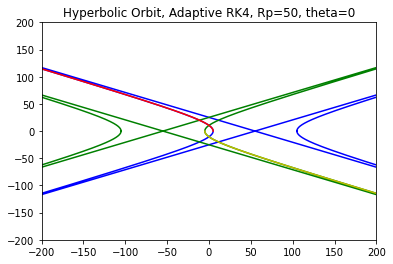

In [18]:
import matplotlib.pyplot as plt
t= np.linspace(-math.pi,math.pi,100000)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
plt.title("Hyperbolic Orbit, Adaptive RK4, Rp="+str(rad0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(hyperbfns.getxtheory(theta0,ecc0,rad0,t,1),hyperbfns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(hyperbfns.getxtheory(theta0,ecc0,rad0,t,-1),hyperbfns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

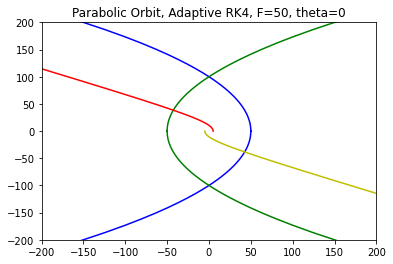

In [19]:
import matplotlib.pyplot as plt
t= np.linspace(0,2*math.pi,100)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
plt.title("Parabolic Orbit, Adaptive RK4, F="+str(rad0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(parabfns.getxtheory(theta0,ecc0,rad0,t,1),parabfns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(parabfns.getxtheory(theta0,ecc0,rad0,t,-1),parabfns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

Adaptive RK4 orbits run and superficially look correct. 

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2
oneellipse=int(len(npdt))
plt.ylim(-200,200)
plt.xlim(-200,200)
#plt.ylim(-1,1)
#plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-1,1)
plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'*y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-10,10)
plt.xlim(-25,-20)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'*y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
nperr

In [ ]:


plt.xlabel("timestep")
plt.ylabel("Rel err: 1/30 *|x2-x1|*(h'/h)^5")
plt.title("Relative error, RK4")
relerrplt,=plt.plot(np.arange(2,oneellipse),nperr[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))
plt.legend(handles=[relerrplt])
plt.show()

This curve should be constant and about equal to delta

In [ ]:


plt.xlabel("timestep number")
plt.ylabel("timestep size")
plt.title("Evolution of timestep with step")
relerrplt,=plt.plot(np.arange(2,oneellipse),npdt[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))

plt.show()

For appropriately set tolerances, adaptive timestep no longer has feedback issues. Tol=delta=0.0005 or less. The important thing is that this curve is smooth and has no constant regions where the value is pinned to either the maximum or minimum. We also seek reasonable starting values for the timestep. 

In [ ]:
plt.xlabel("x")
plt.ylabel("relative error")
plt.title("horizontal position vs relative error")
plt.plot(npstar1x[2:oneellipse,0], nperr[2:oneellipse],'b')
plt.show()

In [ ]:
plt.xlabel("y")
plt.ylabel("rel error")
plt.title("y vs rel error")
plt.plot(npstar1x[2:oneellipse,1],nperr[2:oneellipse])
plt.show()

In [ ]:
plt.xlabel("r")
plt.ylabel("rel error")
plt.title("r vs rel error")
rstar1x=np.sqrt(npstar1x[:,0]**2+npstar1x[:,1]**2)
plt.plot(rstar1x[2:oneellipse],nperr[2:oneellipse],'*b')
plt.show()

In [ ]:
plt.xlabel("t")
plt.ylabel("r")
plt.title("r vs t")
plt.plot(nptimes[2:oneellipse], rstar1x[2:oneellipse], '*b')
plt.show()

In [ ]:
thetaellipse = np.arctan2(npstar1x[2:oneellipse,1],npstar1x[2:oneellipse,0])

In [ ]:
plt.xlabel("t")
plt.ylabel("theta")
plt.title("theta vs t")
plt.plot(nptimes[2:oneellipse],thetaellipse,'b')
plt.show()

In [ ]:
plt.xlabel("theta")
plt.ylabel("rel error")
plt.title("rel error vs theta")
plt.plot(thetaellipse, nperr[2:oneellipse],'*b')
plt.show()


# Conservation of angular momentum

In [ ]:
import Lstability

In [ ]:
deltaL, Lavg=Lstability.Lstability(npstar1x,npstar2x,mass0)
deltaL, Lavg

In [ ]:
deltaL*Lavg

Orbit conserves angular momentum to a tolerance of deltaL. 

# Conservation of Energy

In [ ]:
import Estability

In [ ]:
deltaE, Eavg = Estability.Estability(npstar1x, npstar2x, mass0)
deltaE, Eavg

In [ ]:
deltaE*Eavg

Orbit conserves energy to a relative error of deltaE. 

# Symmetry of the two stars orbits with respect to eachother 

In [ ]:
import orbitSymmetricTol

In [ ]:
allcancelsx, allcancelsa=orbitSymmetricTol.howSymmetric(npstar1x,npstar2x,npstar1a,npstar2a)

In [ ]:
allcancelsx

Orbit is symmetric with respect to x and v up to a tolerance of allcancelsx

In [ ]:
allcancelsa

In [ ]:
npstar1x

Orbit is symmetric with respect to a to up to or better than a tolerance of allcancelsa

# Testing for precision in perihelion and aphelion recovery from knowledge of the initial angle

In [ ]:
import aeTest

In [ ]:
from matplotlib import pyplot as plt
plt.plot( np.abs(npstar1x[:,1]))

In [ ]:
def findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion):
    maxindex=len(npstar1x[:,1])
    apindex=np.argmin(np.abs(npstar1x[10:int(maxindex/2),1]))+1
    print(apindex)
    delta=math.floor(.2*apindex)
    print(delta)
    perindex=np.argmin(np.abs(npstar1x[delta:apindex-delta,1]))+delta
    print(perindex)
    print(apindex/perindex)
    if np.abs(apindex/perindex-2.)>0.05: 
        perindex=np.argmin(np.abs(npstar1x[apindex+delta:2*apindex+delta,1]))+delta+apindex
        print(perindex)
        apindex,perindex=perindex,apindex
        print(apindex,perindex)
        print(apindex/perindex)
    #apindex3=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    #apindex4=np.argmin(np.abs(npstar1x[100:apindex3-100,1]))+100
    #perindex=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    if useperihelion:
        apindex,perindex=perindex,apindex
    coordap=[npstar1x[apindex,0],npstar1x[apindex,1]]
    coordper=[npstar1x[perindex,0],npstar1x[perindex,1]]
    ra=np.sqrt(np.sum(np.array(coordap)**2))
    rp=np.sqrt(np.sum(np.array(coordper)**2))
    e=(ra-rp)/(ra+rp)
    a=1./2.*(ra+rp)
    deltae=np.abs(e-ecc0)/ecc0
    deltaa=np.abs(a-rad0)/rad0
    return apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
if theta0==0:
    apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa=findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion)

In [ ]:
if theta0!=0:
    perindex,apindex,coordper,coordap,rp,ra,e,a,deltae,deltaa=aeTest.findPerApHelion(npstar1x,theta0,ecc0,rad0)

Recovered perihelion radius given by r_per, recovered aphelion radius given by r_ap, a is semimajor axis computed from the orbit, e is eccentricty computed from the orbit, delta a is relative error on the semimajor axis, and delta e is eccenticity relative error. 

In [ ]:
apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
plt.plot(nptimes[:perindex],npstar1x[:perindex,1])

# Fit t as a function of the eccentric anomoly (angle from the center of the elipse)

In [ ]:
def findEccentricAnomoly(coordap, coordper):
    Ecenter=np.array(coordap)+np.array(coordper)
    Ecenter/=2.
    return Ecenter


In [ ]:
ellipsecenter=findEccentricAnomoly(coordap,coordper)

In [ ]:
ellipsecenter

In [ ]:
def getEllipsecenter(ecc,rad,theta, useperihelion):
    #ind of use perihelion
    rp=rad*(1-ecc)
    ra=-rad*(1+ecc)
    rcent=(rp+ra)/2
    #print(rp,ra,rcent)
    rcentx=rcent*np.cos(theta)
    rcenty=rcent* np.sin(theta)
    return [rcentx,rcenty]

In [ ]:
(np.array(coordap)+np.array(coordper))/2

In [ ]:
getEllipsecenter(ecc0,rad0,theta0, True)

In [ ]:
np.arctan2(-1.,0)/math.pi*180

In [ ]:
def getEang(npstar2x,ecc,rad,theta, useperihelion):
    ellipsecenter=getEllipsecenter(ecc,rad,theta, useperihelion)
    #print(ellipsecenter)
    #print(npstar1x)
    #print(npstar1x[:,0])
    xfortan=npstar2x[:,0]-ellipsecenter[0]
    yfortan=npstar2x[:,1]-ellipsecenter[1]
    #print("xy",xfortan,yfortan)
    Eang=np.arctan2(yfortan,xfortan)
    Eangtheta=2*np.arctan2(np.sqrt(1-ecc)*np.sin(theta/2.),np.sqrt(1+ecc)*np.cos(theta/2.))
    Eang-=Eangtheta
    #if useperihelion:
    #    Eang-=math.pi
    print(len(Eang))
    for i in np.arange(len(Eang)):
        #if xfortan[i]<0:
        #    Eang[i]+=math.pi
        if Eang[i]<0:
            Eang[i]+=2*math.pi
    print(xfortan,yfortan,Eang/math.pi*180)
    print("Eang",Eang)
    return xfortan, yfortan,Eang

In [ ]:
np.arctan2(-6.69327422*10**-6, -0.02240526)

In [ ]:
def xofeccanom(rad,Eang,ecc):
    return rad*(np.cos(Eang)+ecc)

In [ ]:
def yofeccanom(rad, Eang, ecc):
    b=getsemiminor(rad,ecc)
    return b*np.sin(Eang) 

In [ ]:
def tofEccAnom(npstar2x, rad,ecc,theta,mass, useperihelion):
    xE0,yE0,Eang=getEang(npstar2x,ecc,rad,theta, useperihelion)
    b=getsemiminor(rad,ecc)
    #fitval=rad*b*(Eang-ecc*np.sin(Eang))
    sgn=-1
    if useperihelion:
        sgn*=-1
    # added a factor of 2 in front of fitval
    fitval=rad**(1.5)*mass**(-.5)*(Eang-sgn*ecc*np.sin(Eang))
    fitval*=2
    print(Eang, ecc,rad,mass,fitval)
    return fitval

In [ ]:
def residualtEang(pars,nptimes,npstar2x):
    residual=np.abs(nptimes-tofEccAnom(npstar2x,pars['rad'],pars['ecc'],pars['theta'],pars['mass'],pars['useperihelion']))
    #print(nptimes, residual)
    return residual

In [ ]:
endindex=apindex
if useperihelion:
    endindex=perindex

In [ ]:
endindex

In [ ]:
xE0,yE0,Eang0=getEang(npstar2x[0:endindex-1,:],ecc0,rad0,theta0, useperihelion)

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
plt.plot(Eang0, xE0)

In [ ]:
plt.plot(Eang0, yE0)

In [ ]:
plt.plot(xE0,yE0)

In [ ]:
plt.plot(nptimesoneorbit,xE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0/xE0)

In [ ]:
np.arctan(0./1.)

In [ ]:
yE0[0]

In [ ]:
xE0[0]

In [ ]:
plt.plot(nptimesoneorbit,np.arctan2(yE0,xE0)*180/math.pi)

In [ ]:
Eangtest=tofEccAnom(npstar2x[0:endindex-1,:],rad0,ecc0,theta0,masses[0], useperihelion)

In [ ]:
np.max(Eangtest)

In [ ]:
nptimes[0]

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
tpredoneorbit=Eangtest[0:endindex-1]

In [ ]:
Eangoneorbit=Eang0[0:endindex-1]

In [ ]:
plt.plot(nptimesoneorbit,npstar2x[0:endindex-1,1])

In [ ]:
plt.plot(nptimesoneorbit,Eangoneorbit/math.pi*180)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit, label='times')
plt.xlabel("T timesteps")
plt.ylabel("T computed from angle")
plt.title("Times using start parameters")
plt.show()
plt.plot(nptimesoneorbit,tpredoneorbit-nptimesoneorbit, label='residual')
plt.legend()
plt.show()


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.scatter(nptimesoneorbit,tpredoneorbit)

In [ ]:
from lmfit import Minimizer,Parameters
pfittEang = Parameters()
pfittEang.add(name='theta', value=theta0, min=theta0-math.pi, max=theta0+math.pi, vary=True)
pfittEang.add(name='rad', value=rad0, min=0, vary=True)
pfittEang.add(name='ecc', value=ecc0, min=0, max=1.0, vary=True)
pfittEang.add(name='mass', value=masses[0], vary=False)
pfittEang.add(name='useperihelion', value=True, vary=False)

minit = Minimizer(residualtEang, pfittEang, fcn_args=(nptimesoneorbit,npstar2x[:endindex-1,:]))

outt = minit.leastsq()

In [ ]:
outt

Semimajor axis fit is good to about .1 percent at an eccentricity of 0.5. rad=49.886512 for delta=0.0001. rad=49.8863857 for delta = 0.0005. ecc = 0.51764747 for delta = 0.0001. ecc = 0.51765166 for delta = 0.0005. so both ecc and rad improve with a smaller delta, but not quickly. The program runs very slowly for large delta and requires 500000 timesteps for delta=0.0001. 

In [ ]:
tfinal=nptimesoneorbit[endindex-2]
tfinal

In [ ]:
from scipy.fft import fft

In [ ]:
from scipy.signal import blackman
wndow=blackman(len(nptimesoneorbit))

In [ ]:
ftresiduals=fft(nptimesoneorbit-tpredoneorbit)

In [ ]:
xf = np.linspace(0.0, 1.0/(2.0*dt), len(nptimesoneorbit)//2)

In [ ]:
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:len(nptimesoneorbit)//2]), '-b')

In [ ]:
ftr=fft(np.sqrt(npstar1x[:endindex-1,0]**2+npstar1x[:endindex-1,1]**2))

In [ ]:
plt.xlabel("frequency")
plt.ylabel("Fourier transform of t(E)")
plt.title("Fourier transform of time computed from eccentric anomaly")
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftr[1:len(nptimesoneorbit)//2]), '-b')

This is the fourier transform of the triangle wave.

In [ ]:
plt.title("Fourier transform of residuals of times")
plt.xlabel("frequency")
plt.ylabel("FT(t(E))")
plt.semilogy(xf[1:50], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:50]), '-b')

In [ ]:
plt.xlabel("bin number")
plt.ylabel("FT(t(E))")
plt.title("Fourier transform of residuals of times")
plt.semilogy(np.arange(1,30), 2.0/len(nptimesoneorbit[:29]) * np.abs(ftresiduals[1:30]), '*b')

Peak at the second harmonic and the sixth harmonic. The second harmonic seems natural due to the symmetry of the orbit but the sixth harmonic is harder to explain. 

Implementing the Adaptive RK4 hasn't changed the fit, residuals, or harmonics, sadly. There is still a 2% error in the fit for an eccentricity of 0.5